In [1]:
import pandas as pd
import seaborn as sns

In [4]:
reviews = pd.read_csv('C:/Users/Eri/Documents/PSTAT 135/135-Project/reviews.csv')
breweries = pd.read_csv('C:/Users/Eri/Documents/PSTAT 135/135-Project/breweries.csv')
beers = pd.read_csv('C:/Users/Eri/Documents/PSTAT 135/135-Project//beers.csv')

In [5]:
# Dimensions of all dataframes
print(reviews.shape)
print(breweries.shape)
print(beers.shape)

(9073128, 10)
(50347, 7)
(358873, 10)


In [9]:
# Columns for all dataframes
print(reviews.columns)
print(breweries.columns)
print(beers.columns)

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')
Index(['id', 'name', 'city', 'state', 'country', 'notes', 'types'], dtype='object')
Index(['id', 'name', 'brewery_id', 'state', 'country', 'style', 'availability',
       'abv', 'notes', 'retired'],
      dtype='object')


In [6]:
# Removing rows with empty text in reviews 
non_empty_reviews = reviews[reviews['text'] != '\xa0\xa0']

In [7]:
# Dimenions for non empty reviews 
non_empty_reviews.shape

(2987993, 10)

In [10]:
beers.head()

id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  214879                        Scottish Right       44306    IN      US   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
4  246438                       Peaches-N-Cream       44617    PA      US   

                     style availability   abv                   notes retired  
0    English Oatmeal Stout     Rotating   7.3  No notes at this time.       f  
1   Russian Imperial Stout     Rotating  10.4  No notes at this time.       f  
2             Scottish Ale   Year-round   4.0  No notes at this time.       t  
3  American Imperial Stout       Winter   8.7    Every time this year       f  
4       American Cream Ale     Rotating   5.1  No notes at this time.       f

In [11]:
non_empty_reviews.head()

beer_id         username        date  \
0    271781     bluejacket74  2017-03-17   
3    125646  GratefulBeerGuy  2017-12-20   
4    125646         LukeGude  2017-12-20   
7    125646             MFMB  2017-12-16   
13   125646      jngrizzaffi  2017-12-10   

                                                 text  look  smell  taste  \
0      750 ml bottle, 2016 vintage, bottle #304 of...  4.00   4.00   4.00   
3      0% 16 oz can. Funny story: As I finally wal...  4.75   4.75   4.50   
4      Classic TH NEIPA. Overflowing head and bouq...  4.25   4.50   4.25   
7      Pours a creamy opaque light straw yellow wi...  4.75   4.50   4.50   
13     Pours a cloudy yellow color with a thin foa...  4.50   4.50   4.50   

    feel  overall  score  
0   4.25     4.00   4.03  
3   4.50     4.50   4.58  
4   4.25     4.25   4.31  
7   4.50     4.50   4.52  
13  4.75     4.50   4.53

In [20]:
# Top 10 most reviewed beers
non_empty_reviews['beer_id'].value_counts()[:10]

645      4364
11757    4300
2093     4252
7971     4155
1093     4054
412      4001
17112    3905
695      3786
19960    3738
1904     3675
Name: beer_id, dtype: int64

In [21]:
top10 = non_empty_reviews['beer_id'].value_counts()[:10].index.tolist()

mainDF = non_empty_reviews[non_empty_reviews['beer_id'].isin(top10)]

In [30]:
mean_scores = mainDF.groupby('beer_id').mean()
mean_scores

look     smell     taste      feel   overall     score
beer_id                                                            
412      4.394287  4.207664  4.341622  4.246940  4.223731  4.282589
645      4.360932  4.426233  4.544260  4.449532  4.401161  4.476897
695      4.484574  4.146965  4.317740  4.261653  4.329645  4.275512
1093     4.170073  4.227479  4.301981  4.162314  4.301918  4.266951
1904     4.237674  4.072214  4.188649  4.087117  4.175209  4.153059
2093     4.205518  4.182736  4.307165  4.189409  4.173780  4.231223
7971     4.453649  4.600645  4.624907  4.499504  4.599715  4.594455
11757    4.406430  4.442298  4.514935  4.414167  4.425264  4.468623
17112    4.286148  4.459011  4.466951  4.329009  4.382649  4.424223
19960    4.453661  4.549878  4.602409  4.490542  4.484894  4.548810

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


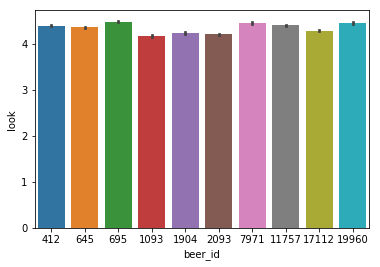

In [38]:
# Column 'look'
sns.barplot(x = 'beer_id', y = 'look', data = mainDF)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


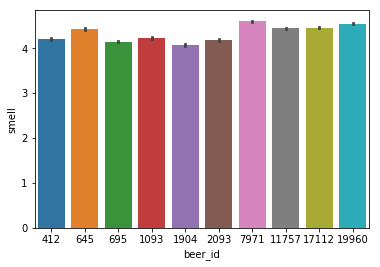

In [39]:
# Column 'smell'
sns.barplot(x = 'beer_id', y = 'smell', data = mainDF)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


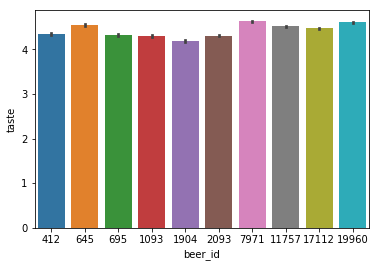

In [40]:
# Column 'taste'
sns.barplot(x = 'beer_id', y = 'taste', data = mainDF)